In [1]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List
%run cardiac_ml_tools.py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Reading In The Data

In [3]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR='../intracardiac_dataset/' # This should be the path to the intracardiac_dataset, it can be downloaded using data_science_challenge_2023/download_intracardiac_dataset.sh
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)

In [4]:
num_timesteps = 500

In [5]:
all_pECG_data = np.empty(shape=(len(file_pairs), num_timesteps, 12))
all_Vm_data = np.empty(shape=(len(file_pairs), num_timesteps, 75))
for index,(pecg, vm) in enumerate(file_pairs):
    print("pecg", pecg)
    print("vm", vm)
    all_Vm_data[index] = np.load(vm)
    all_pECG_data[index] = get_standard_leads(np.load(pecg))

pecg ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.000.pattern.0.volunteer.v12.npy
vm ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/VmData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.000.pattern.0.volunteer.v12.npy
pecg ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.000.pattern.0.volunteer.v16.npy
vm ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/VmData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.000.pattern.0.volunteer.v16.npy
pecg ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.000.pattern.0.volunteer.v2.npy
vm ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/VmData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.000.pattern.0.volunteer.v2.npy
pecg ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl

# Normalizing The Data

In [6]:
# Getting the range of the data
print("Maximum value in the whole array:%d"%(all_pECG_data.max()))                    
print("Maximum value in the whole array:%d"%(all_pECG_data.min()))                    
print("Maximum value in the whole array:%d"%(all_Vm_data.max()))                    
print("Maximum value in the whole array:%d"%(all_Vm_data.min()))                    

Maximum value in the whole array:5
Maximum value in the whole array:-5
Maximum value in the whole array:49
Maximum value in the whole array:-93



We can see that 
* pECG Data is between -5 and 5
* Vm Data is between -93 and 49

In [7]:
# all_pECG_data = (all_pECG_data + 5) / 10
# all_Vm_data = (all_Vm_data + 100) / 150

# Splitting The Data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(all_pECG_data, all_Vm_data, test_size = 0.20, random_state = 0)

# Defining The Model

In [9]:
from tensorflow.keras.layers import Conv1D, Input, Dense, Flatten, Lambda, Conv1DTranspose, Reshape
import tensorflow as tf
from tensorflow import keras


In [17]:
def get_model(upscale_dimension=75, channels=1):
    conv_args = {
        "activation": "relu",
        'kernel_size': 5,
        'strides': 1,
        'padding': 'same'
    }
    input_layer = keras.Input(shape=(500, 12))
    
    layer = keras.layers.Conv1D(filters=32, **conv_args)(input_layer)
    layer = keras.layers.Conv1D(filters=64, **conv_args)(layer)
    layer = keras.layers.Conv1D(filters=128, **conv_args)(layer)
    layer = keras.layers.Conv1D(filters=256, **conv_args)(layer)
    # convt = keras.layers.Conv1DTranspose(filters=75, kernel_size=1, **conv_args)(conv)
    
    output_layer = keras.layers.Dense(units=75)(layer)
    
    return keras.Model(input_layer, output_layer)
model = get_model()
display(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 500, 12)]         0         
                                                                 
 conv1d_6 (Conv1D)           (None, 500, 32)           1952      
                                                                 
 conv1d_7 (Conv1D)           (None, 500, 64)           10304     
                                                                 
 conv1d_8 (Conv1D)           (None, 500, 128)          41088     
                                                                 
 conv1d_9 (Conv1D)           (None, 500, 256)          164096    
                                                                 
 dense_5 (Dense)             (None, 500, 75)           19275     
                                                                 
Total params: 236,715
Trainable params: 236,715
Non-trainab

None

In [18]:
model = get_model()
display(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 500, 12)]         0         
                                                                 
 conv1d_10 (Conv1D)          (None, 500, 32)           1952      
                                                                 
 conv1d_11 (Conv1D)          (None, 500, 64)           10304     
                                                                 
 conv1d_12 (Conv1D)          (None, 500, 128)          41088     
                                                                 
 conv1d_13 (Conv1D)          (None, 500, 256)          164096    
                                                                 
 dense_6 (Dense)             (None, 500, 75)           19275     
                                                                 
Total params: 236,715
Trainable params: 236,715
Non-trainab

None

In [19]:
loss_fn = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.1)

In [20]:
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
history = model.fit(x_train, y_train, 
          epochs=150, 
          batch_size=32,
          validation_data=(x_test, y_test),
          shuffle=True)

2023-07-25 13:58:10.581833: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/150
403/403 [==============================] - 18s 37ms/step - loss: 29.1211 - accuracy: 0.0833 - val_loss: 20.6989 - val_accuracy: 0.1437
Epoch 2/150
403/403 [==============================] - 10s 26ms/step - loss: 17.3201 - accuracy: 0.1145 - val_loss: 15.3518 - val_accuracy: 0.1175
Epoch 3/150
403/403 [==============================] - 10s 25ms/step - loss: 14.1165 - accuracy: 0.1194 - val_loss: 13.3533 - val_accuracy: 0.1136
Epoch 4/150
403/403 [==============================] - 10s 26ms/step - loss: 12.6449 - accuracy: 0.1189 - val_loss: 12.3124 - val_accuracy: 0.1182
Epoch 5/150
403/403 [==============================] - 10s 24ms/step - loss: 11.6946 - accuracy: 0.1208 - val_loss: 11.4376 - val_accuracy: 0.1124
Epoch 6/150
403/403 [==============================] - 9s 23ms/step - loss: 10.9010 - accuracy: 0.1271 - val_loss: 10.9944 - val_accuracy: 0.1225
Epoch 7/150
403/403 [==============================] - 10s 25ms/step - loss: 10.5987 - accuracy: 0.1313 - val_loss: 10.

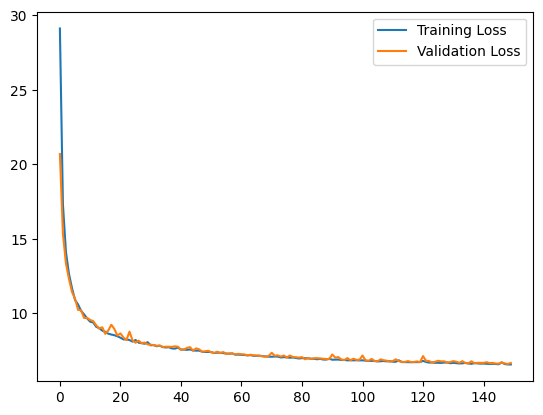

In [21]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

75


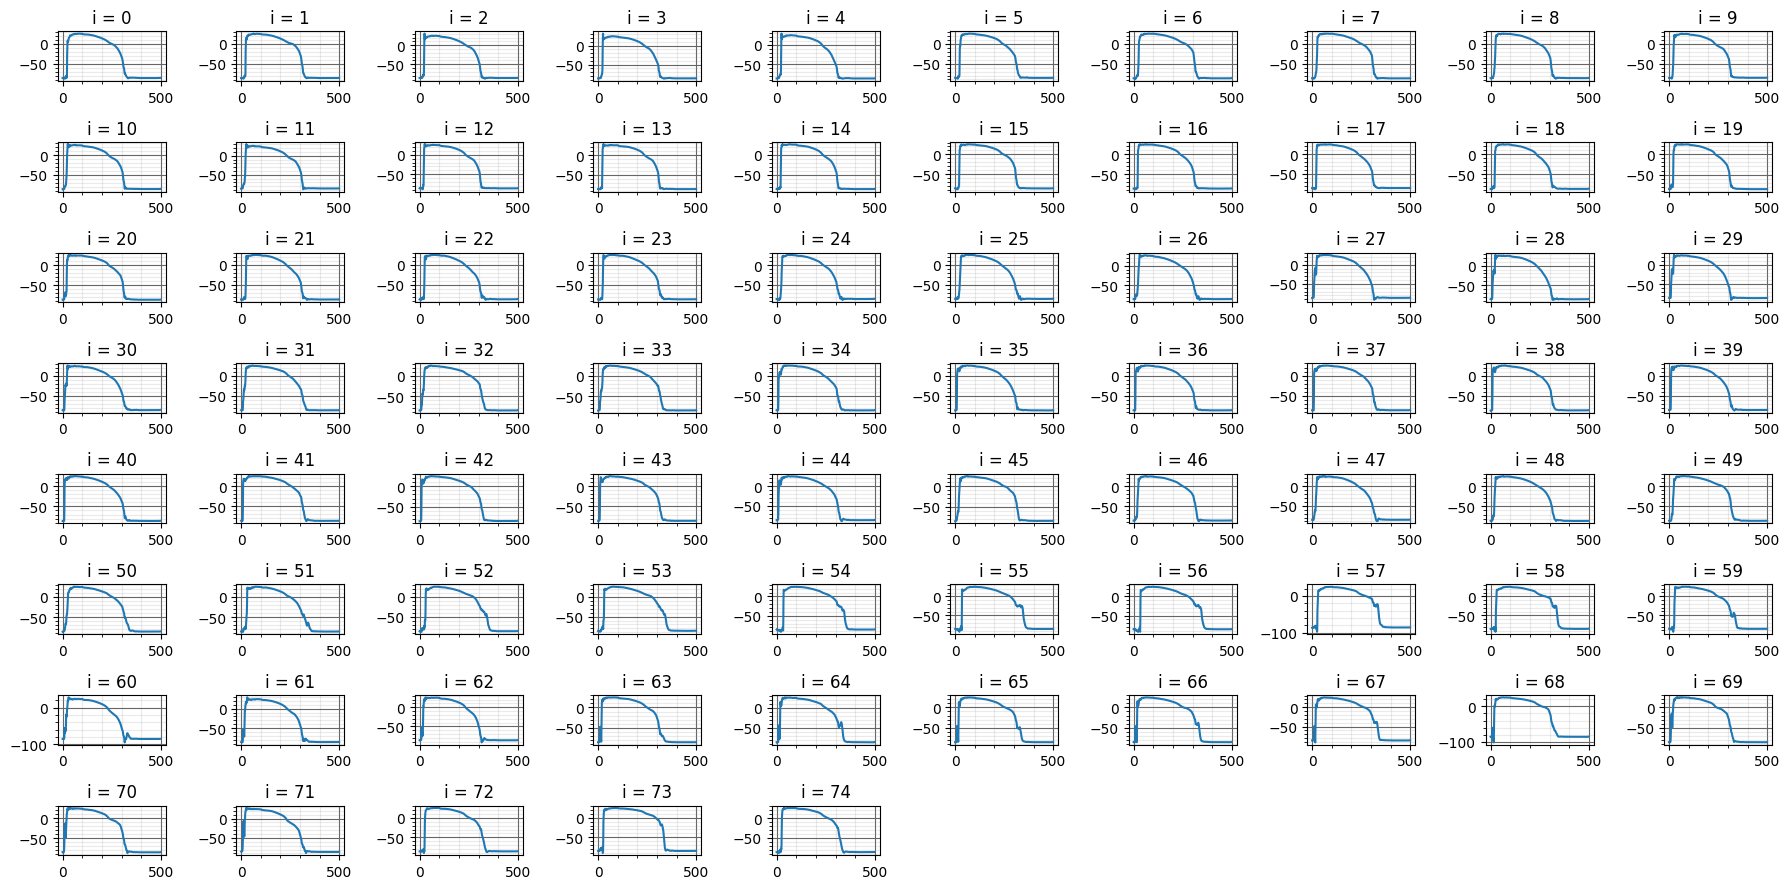

75


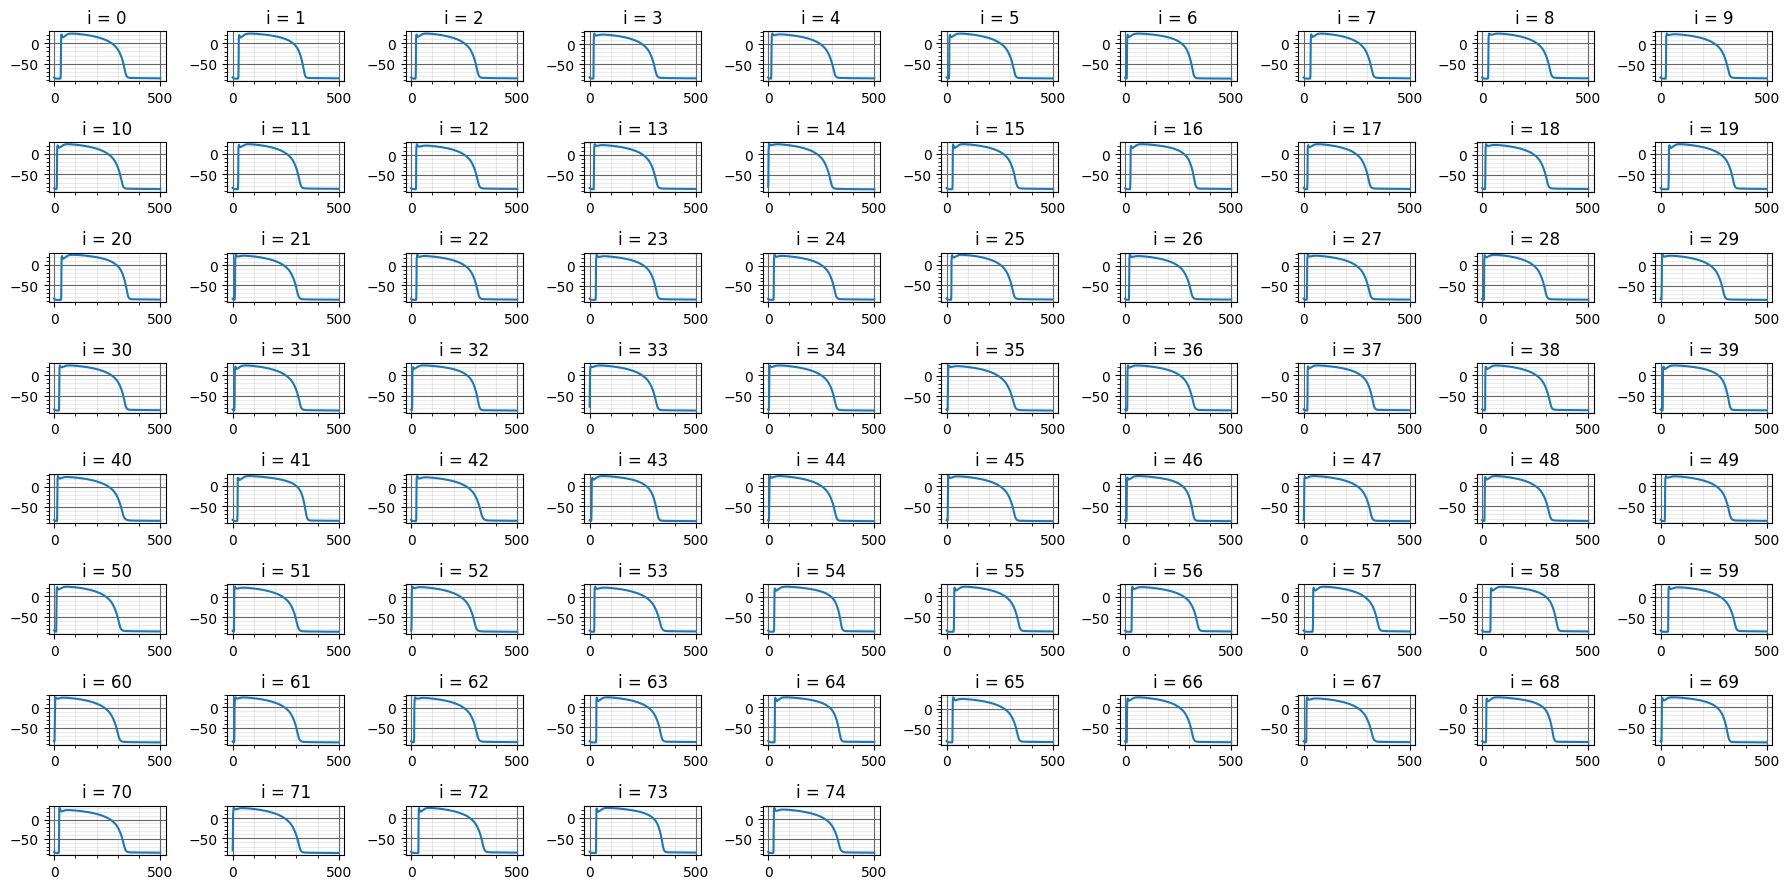

In [23]:
sample = 45
image = x_test[sample:sample+1]
decoded_imgs = model(image).numpy()
VmData = decoded_imgs[0]
row = 7
column = 10
plt.figure(figsize=(18, 9))

print(VmData.shape[1])
for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:num_timesteps,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

VmData = y_test[sample]
plt.figure(figsize=(18, 9))

print(VmData.shape[1])
for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:num_timesteps,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()